In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

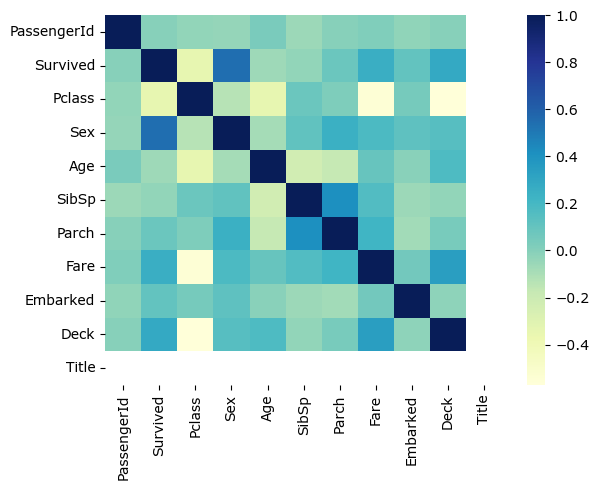

In [19]:
import seaborn as sns
df_num_data = df.select_dtypes(include=[np.number])
sns.heatmap(df_num_data.corr(), cmap='YlGnBu')
plt.show()

In [50]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Deck'] = df['Cabin'].str.slice(0,1) 
df['Deck'] = df['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6,"G":7, "T":8})
df['Deck'] = df['Deck'].fillna(0)
df['Deck'] = df['Deck'].astype(np.int64)
df.drop(columns=['Ticket'], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [51]:
df['Embarked'] = df['Embarked'].map({'S': 0,'C': 1, 'Q': 2})
df['Embarked'] = df['Embarked'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})
df['Fare'] = df['Fare'].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,13,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28,1,2,23,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30,1,3


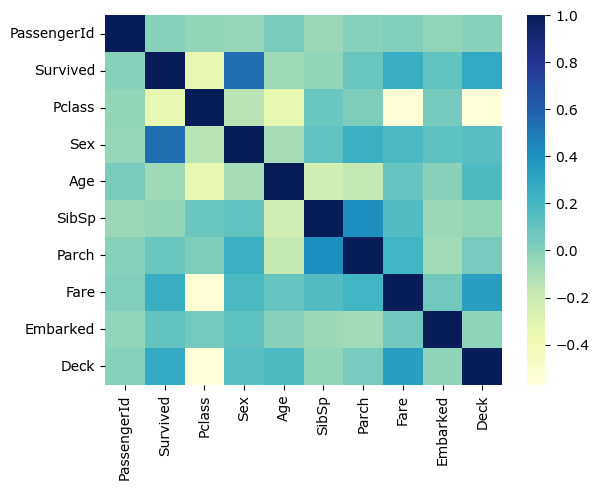

In [7]:
df_num_data = df.select_dtypes(include=[np.number])
sns.heatmap(df_num_data.corr(), cmap='YlGnBu')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Deck', ]
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8324


Pclass      0.151656
Sex         0.667846
Age         0.032894
Parch       0.027092
Fare        0.039158
Embarked    0.025860
Deck        0.055494
dtype: float32


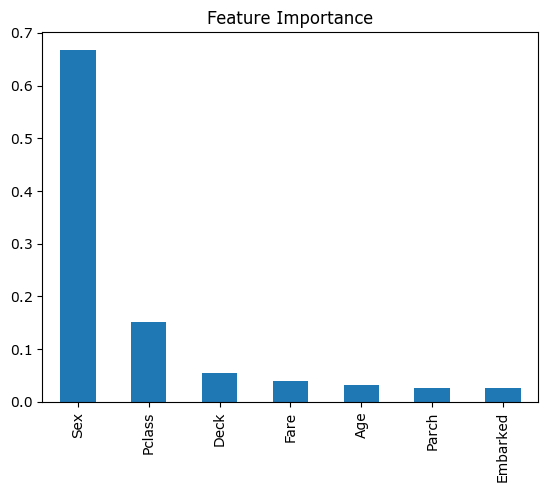

In [11]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
print(importance)
plt.show()

In [52]:
import re
def extract_title(name):
    title_search = re.search(r'(\w+)\.', name)
    return title_search.group(1) if title_search else "Unknown"

In [53]:
if 'Name' in df.columns:
    df['Title'] = df['Name'].apply(extract_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,Mr


In [55]:
title_map = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
    "Mlle": "Miss", "Mme": "Mrs", "Countess": "Rare", "Sir": "Rare",
    "Jonkheer": "Rare", "Don": "Rare", "Lady": "Rare", "Capt": "Rare"
}

df['Title'] = df['Title'].map(title_map)
title_rank = {"Mr": 5, "Miss": 2, "Mrs": 1, "Master": 3, "Rare": 4}  # Define proper rankings
df['Title_Rank'] = df['Title'].map(title_rank)
df['Title_Rank'] = df['Title_Rank'].fillna(max(title_rank.values()) + 1).astype(int)  # Handle missing values
df.drop(columns=['Title'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title_Rank
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3,6
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,6


In [77]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title_Rank
0,1,0,3,0,22,1,0,7,0,0,5
1,2,1,1,1,38,1,0,71,1,3,1
2,3,1,3,1,26,0,0,7,0,0,2
3,4,1,1,1,35,1,0,53,0,3,1
4,5,0,3,0,35,0,0,8,0,0,5


In [78]:
ranked_features = importance.rank(ascending=False)
print(ranked_features)

Pclass      2.0
Sex         1.0
Age         5.0
Parch       6.0
Fare        4.0
Embarked    7.0
Deck        3.0
dtype: float64


Series([], Name: Survived, dtype: float64)
Series([], Name: Survived, dtype: float64)


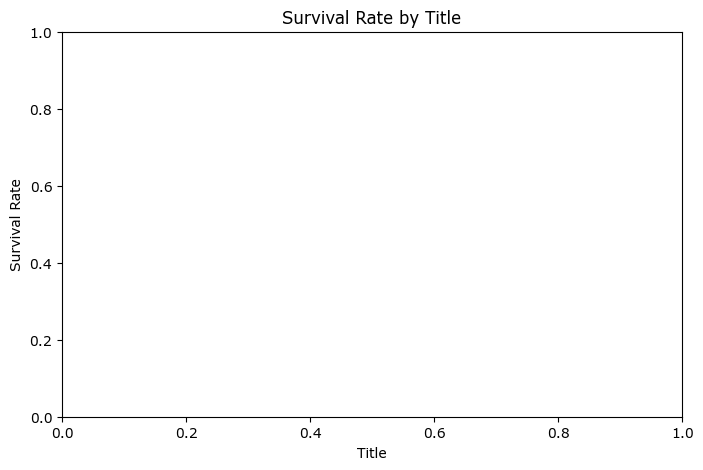

In [21]:
title_survival_rate = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print(title_survival_rate)

title_rank = title_survival_rate.rank(ascending=False)
print(title_rank)

plt.figure(figsize=(8, 5))
sns.barplot(x=title_survival_rate.index, y=title_survival_rate.values, palette="viridis")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Title")
plt.show()

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Title_Rank
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,NaN,NaN


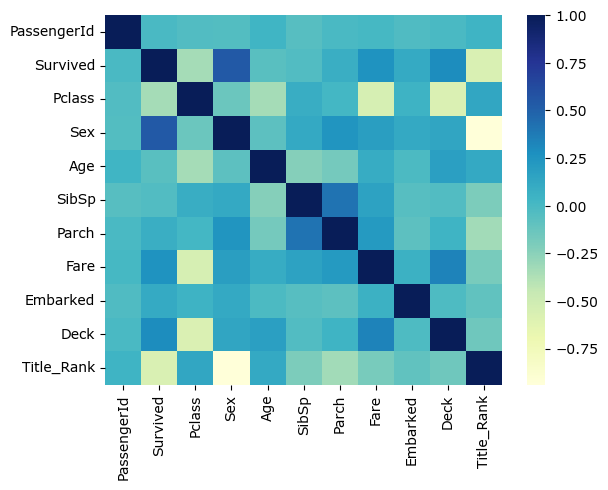

In [79]:
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

Pclass      0.151656
Sex         0.667846
Age         0.032894
Parch       0.027092
Fare        0.039158
Embarked    0.025860
Deck        0.055494
dtype: float32


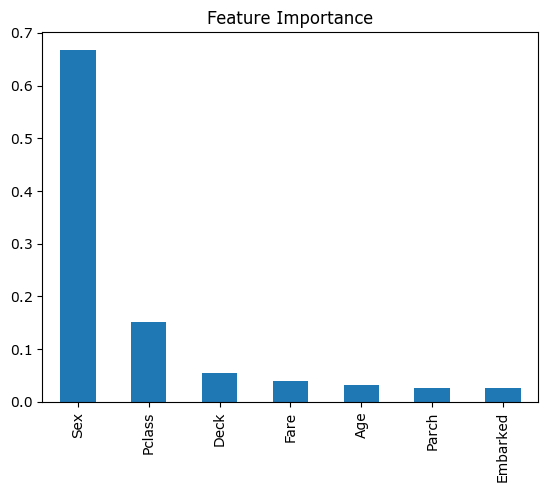

In [27]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
print(importance)
plt.show()

In [82]:
features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Deck', 'Title_Rank' ]
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8659


In [32]:
# df['Family_size'] = df['SibSp'] + df['Parch'] + 1
# df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Title_Rank
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,NaN,NaN


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [86]:

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# Print Accuracy Scores
print(f"Logistic Regression: {acc_log}%")
print(f"Support Vector Machines: {acc_svc}%")
print(f"K-Nearest Neighbors: {acc_knn}%")
print(f"Gaussian Naive Bayes: {acc_gaussian}%")
print(f"Perceptron: {acc_perceptron}%")
print(f"Linear SVC: {acc_linear_svc}%")
print(f"Stochastic Gradient Descent: {acc_sgd}%")
print(f"Decision Tree: {acc_decision_tree}%")
print(f"Random Forest: {acc_random_forest}%")

C:\Users\kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 82.44%
Support Vector Machines: 68.54%
K-Nearest Neighbors: 85.53%
Gaussian Naive Bayes: 77.81%
Perceptron: 72.61%
Linear SVC: 82.3%
Stochastic Gradient Descent: 77.11%
Decision Tree: 96.49%
Random Forest: 96.49%
